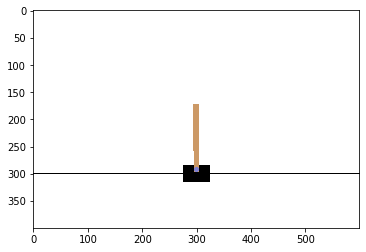

In [1]:
import gym 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
env = gym.make("CartPole-v0")
env.reset()
n_actions = env.action_space.n

plt.imshow(env.render("rgb_array"))

In [2]:
from joblib import Parallel, delayed

In [3]:
N = 1000 # n_of_frames for each game 
npop = 100 # population size
sigma= 0.1 # deviation 
w = np.random.randn(4) # probabilities of action_0 on each frame ## to update!
alpha =0.1 #learning rate

In [4]:
def training(w_new):
    env = gym.make("CartPole-v0")
    s = env.reset()
    rewards= []
    for j in range(N):
        prob = np.clip(np.dot(w_new.T,s),0,1)
        p = [prob,1.-prob]
        new_state, r, done, _ = env.step(np.random.choice(n_actions,p = p))
        rewards.append(r)
        s=new_state
        if done:
            break
    return sum(rewards)

In [5]:
def full_train(w):
    for n_episodes in range(1000):
        R=[]
        w_try = np.random.randn(npop,4) 
    
        for i in range(npop):
            w_new=w + sigma*w_try[i]
            R.append(training(w_new))
        if n_episodes%10 == 0: print('episode of game {}, mean reward over population {}'
                                .format(n_episodes, np.mean(R)))
        if np.mean(R) > 195: 
            print('iteration {} mean reward over population {}'.format(n_episodes,np.mean(R)))
            break
        R = (R-np.mean(R))/(1+np.std(R))
        w += alpha/(npop*sigma)* np.dot(w_try.T,R)   
    return w

In [6]:
%%time
w_new = full_train(w)

episode of game 0, mean reward over population 20.06
episode of game 10, mean reward over population 180.14
iteration 13 mean reward over population 197.55
CPU times: user 10.4 s, sys: 42.3 ms, total: 10.5 s
Wall time: 10.5 s


In [7]:
N = 1000 # n_of_frames for each game 
npop = 100 # population size
sigma= 0.1 # deviation 
w = np.random.randn(4) # probabilities of action_0 on each frame ## to update!
alpha =0.1 #learning rate

In [8]:
def training_parallel(w_new):
    env = gym.make("CartPole-v0").env
    s = env.reset()
    rewards= []
    for j in range(N):
        prob = np.clip(np.dot(w_new.T,s),0,1)
        p = [prob,1.-prob]
        new_state, r, done, _ = env.step(np.random.choice(n_actions,p = p))
        rewards.append(r)
        s=new_state
        if done:
            break
    return sum(rewards)

In [9]:
def full_train_parallel(w):
    for n_episodes in range(1000):
        w_try = np.random.randn(npop, 4) 
        R = Parallel(n_jobs=4)(delayed(training_parallel)(w+sigma*w_try[i]) for i in range(npop))
        
        if n_episodes%10 == 0: print('episode of game {}, mean reward over population {}'
                                .format(n_episodes, np.mean(R)))
        if np.mean(R) > 195: 
            print('iteration {} mean reward over population {}'.format(n_episodes,np.mean(R)))
            break
        R = (R-np.mean(R))/(1+np.std(R))
        w += alpha/(npop*sigma)* np.dot(w_try.T,R)    
    return w

In [10]:
%%time
w_new = full_train_parallel(w)

episode of game 0, mean reward over population 26.18
episode of game 10, mean reward over population 44.14
episode of game 20, mean reward over population 60.44
episode of game 30, mean reward over population 57.76
episode of game 40, mean reward over population 64.38
episode of game 50, mean reward over population 71.36
episode of game 60, mean reward over population 72.76
iteration 67 mean reward over population 195.26
CPU times: user 5.29 s, sys: 148 ms, total: 5.44 s
Wall time: 11.7 s
